<a href="https://colab.research.google.com/github/RoseyGreenBlue/Syllabus/blob/main/cmsc320_hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import pprint
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

Loading data

In [4]:
# 60/20/20 train/test/valid split

path = "./drive/MyDrive/cmsc320/HW4/homework4.csv"
df = pd.read_csv(path)

index = ["%d"%i for i in range(12)] + ["Results"]
data = np.array(df[index])

#regularize
means = np.average(data[:,:12], axis=0)
stds = np.std(data[:,:12], axis=0)
data[:,:12] = np.subtract(np.divide(data[:,:12], stds), means)

#shuffle data
np.random.shuffle(data)

This is model 1 trained on 10-fold CV: A SVM. The model achieves a peak accuracy of 75.1% accuracy and a peak precision of 32.0% across all runs

In [ ]:
# 10-fold Cross validation
kfold = KFold(n_splits=10)

for i, (train_index, test_index) in enumerate(kfold.split(data)):
  train = data[train_index, :]
  test = data[test_index, :]

  svm_classifier = LinearSVC(class_weight='balanced')
  svm_classifier.fit(train[:, :12], train[:,12])

  output = svm_classifier.predict(test[:,:12])
  #C_ij = i actual, j predicted
  c_matrix = confusion_matrix(test[:,12], output)
  print("confusion matrix:")
  print(c_matrix)
  print("true positive:\t%d\ntrue negative:\t%d\nfalse positive:\t%d\nfalse negative:\t%d"%(c_matrix[1,1], c_matrix[0,0], c_matrix[0,1], c_matrix[1,0]))
  precision = c_matrix[1,1] / (c_matrix[1,1] + c_matrix[0,1])
  recall = c_matrix[1,1] / (c_matrix[1,1] + c_matrix[1,0])
  print("\naccuracy:\t%f"%(np.sum(np.equal(output, test[:,12])) / 1000))
  print("precision:\t%f\nrecall:\t\t%f"%(precision, recall))
  print("\n")

confusion matrix:
[[612 239]
 [ 52  97]]
true positive:	97
true negative:	612
false positive:	239
false negative:	52

accuracy:	0.709000
precision:	0.288690
recall:		0.651007


confusion matrix:
[[637 234]
 [ 45  84]]
true positive:	84
true negative:	637
false positive:	234
false negative:	45

accuracy:	0.721000
precision:	0.264151
recall:		0.651163


confusion matrix:
[[653 193]
 [ 63  91]]
true positive:	91
true negative:	653
false positive:	193
false negative:	63

accuracy:	0.744000
precision:	0.320423
recall:		0.590909


confusion matrix:
[[650 196]
 [ 58  96]]
true positive:	96
true negative:	650
false positive:	196
false negative:	58

accuracy:	0.746000
precision:	0.328767
recall:		0.623377


confusion matrix:
[[644 221]
 [ 55  80]]
true positive:	80
true negative:	644
false positive:	221
false negative:	55

accuracy:	0.724000
precision:	0.265781
recall:		0.592593


confusion matrix:
[[633 223]
 [ 45  99]]
true positive:	99
true negative:	633
false positive:	223
false negative:	4

This is model 2: A neural network. The model achieves above a 90% accuracy on almost every iteration of the 10-fold CV and has above 50% precision for every iteration

In [ ]:
# 10-fold Cross validation
kfold = KFold(n_splits=10)

for i, (train_index, test_index) in enumerate(kfold.split(data)):
  train = data[train_index, :]
  test = data[test_index, :]

  nn_classifier = MLPClassifier()
  nn_classifier.fit(train[:, :12], train[:,12])

  output = nn_classifier.predict(test[:,:12])
  #C_ij = i actual, j predicted
  c_matrix = confusion_matrix(test[:,12], output)
  print("confusion matrix:")
  print(c_matrix)
  print("true positive:\t%d\ntrue negative:\t%d\nfalse positive:\t%d\nfalse negative:\t%d"%(c_matrix[1,1], c_matrix[0,0], c_matrix[0,1], c_matrix[1,0]))
  precision = c_matrix[1,1] / (c_matrix[1,1] + c_matrix[0,1])
  recall = c_matrix[1,1] / (c_matrix[1,1] + c_matrix[1,0])
  print("\naccuracy:\t%f"%(np.sum(np.equal(output, test[:,12])) / 1000))
  print("precision:\t%f\nrecall:\t\t%f"%(precision, recall))
  print("\n")

confusion matrix:
[[846   5]
 [ 83  66]]
true positive:	66
true negative:	846
false positive:	5
false negative:	83

accuracy:	0.912000
precision:	0.929577
recall:		0.442953




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


confusion matrix:
[[861  10]
 [ 60  69]]
true positive:	69
true negative:	861
false positive:	10
false negative:	60

accuracy:	0.930000
precision:	0.873418
recall:		0.534884


confusion matrix:
[[830  16]
 [ 91  63]]
true positive:	63
true negative:	830
false positive:	16
false negative:	91

accuracy:	0.893000
precision:	0.797468
recall:		0.409091




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


confusion matrix:
[[837   9]
 [ 86  68]]
true positive:	68
true negative:	837
false positive:	9
false negative:	86

accuracy:	0.905000
precision:	0.883117
recall:		0.441558


confusion matrix:
[[855  10]
 [ 83  52]]
true positive:	52
true negative:	855
false positive:	10
false negative:	83

accuracy:	0.907000
precision:	0.838710
recall:		0.385185


confusion matrix:
[[849   7]
 [ 73  71]]
true positive:	71
true negative:	849
false positive:	7
false negative:	73

accuracy:	0.920000
precision:	0.910256
recall:		0.493056


confusion matrix:
[[861   7]
 [ 68  64]]
true positive:	64
true negative:	861
false positive:	7
false negative:	68

accuracy:	0.925000
precision:	0.901408
recall:		0.484848


confusion matrix:
[[857   5]
 [ 86  52]]
true positive:	52
true negative:	857
false positive:	5
false negative:	86

accuracy:	0.909000
precision:	0.912281
recall:		0.376812


confusion matrix:
[[862   8]
 [ 72  58]]
true positive:	58
true negative:	862
false positive:	8
false negative:	72

accuracy

This is model 3: A Decision Tree. The maximum accuracy and Recall achieved over 10-fold CV is 86.7% accuracy and 49.6% precision

In [ ]:
# 10-fold Cross validation
kfold = KFold(n_splits=10)

for i, (train_index, test_index) in enumerate(kfold.split(data)):
  train = data[train_index, :]
  test = data[test_index, :]

  dtree_classifier = DecisionTreeClassifier()
  dtree_classifier.fit(train[:, :12], train[:,12])

  output = dtree_classifier.predict(test[:,:12])
  print("iter %d:\n------------------"%(i+1))

  #C_ij = i actual, j predicted
  c_matrix = confusion_matrix(test[:,12], output)
  print("confusion matrix:")
  print(c_matrix)
  print("true positive:\t%d\ntrue negative:\t%d\nfalse positive:\t%d\nfalse negative:\t%d"%(c_matrix[1,1], c_matrix[0,0], c_matrix[0,1], c_matrix[1,0]))
  precision = c_matrix[1,1] / (c_matrix[1,1] + c_matrix[0,1])
  recall = c_matrix[1,1] / (c_matrix[1,1] + c_matrix[1,0])
  print("\naccuracy:\t%f"%(np.sum(np.equal(output, test[:,12])) / 1000))
  print("precision:\t%f\nrecall:\t\t%f"%(precision, recall))
  print("\n")

iter 1:
------------------
confusion matrix:
[[779  72]
 [ 80  69]]
true positive:	69
true negative:	779
false positive:	72
false negative:	80

accuracy:	0.848000
precision:	0.489362
recall:		0.463087


iter 2:
------------------
confusion matrix:
[[767 104]
 [ 59  70]]
true positive:	70
true negative:	767
false positive:	104
false negative:	59

accuracy:	0.837000
precision:	0.402299
recall:		0.542636


iter 3:
------------------
confusion matrix:
[[769  77]
 [ 85  69]]
true positive:	69
true negative:	769
false positive:	77
false negative:	85

accuracy:	0.838000
precision:	0.472603
recall:		0.448052


iter 4:
------------------
confusion matrix:
[[762  84]
 [ 90  64]]
true positive:	64
true negative:	762
false positive:	84
false negative:	90

accuracy:	0.826000
precision:	0.432432
recall:		0.415584


iter 5:
------------------
confusion matrix:
[[776  89]
 [ 81  54]]
true positive:	54
true negative:	776
false positive:	89
false negative:	81

accuracy:	0.830000
precision:	0.377622
reca

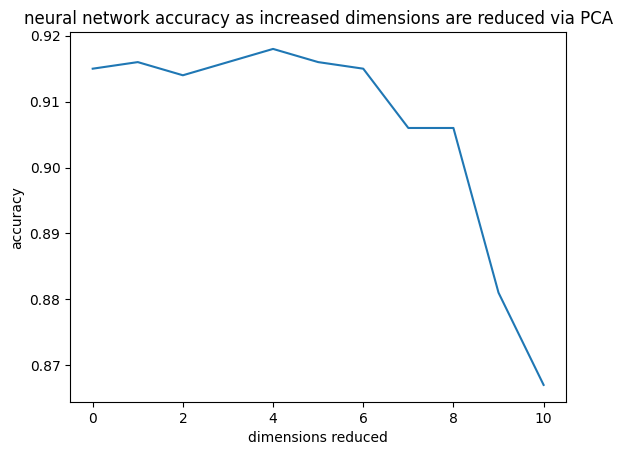

In [15]:
plot_data = np.zeros((11,2))

for i in range(12,1,-1):
  pca = PCA(n_components = i)
  data_transformed = np.ascontiguousarray(pca.fit_transform(data[:,:i])).astype(float)

  train = data_transformed[:9000,:]
  test = data_transformed[9000:,:]

  nn_classifier = MLPClassifier()
  nn_classifier.fit(train[:,:-1], data[:9000,-1])
  output = nn_classifier.predict(test[:,:-1])

  accuracy = np.sum(np.equal(output, data[9000:,-1])) / 1000
  plot_data[12 - i] = [12-i,accuracy]
print()

plt.plot(plot_data[:,0], plot_data[:,1])
plt.title("neural network accuracy as increased dimensions are reduced via PCA")
plt.xlabel("dimensions reduced")
plt.ylabel("accuracy")
plt.show()

As can be seen, the accuracy of the model drops off once PCA drops 9 dimensions. i.e. the accuracy drops off when PCA projects the data to 3 dimensions or less